# Experimental Design in Python

## Experimental Design Preliminaries

### Setting up experiments

#### Non-random assignment of subjects
An agricultural firm is conducting an experiment to measure how feeding sheep different types of grass affects their weight. They have asked for your help to properly set up the experiment. One of their managers has said you can perform the subject assignment by taking the top 250 rows from the DataFrame and that should be fine.

Your task is to use your analytical skills to demonstrate why this might not be a good idea. Assign the subjects to two groups using non-random assignment (the first 250 rows) and observe the differences in descriptive statistics.

You have received the DataFrame, weights which has a column containing the weight of the sheep and a unique id column.

numpy and pandas have been imported as np and pd, respectively.

In [7]:
import numpy as np
import pandas as pd

In [8]:
df_chick_weights = pd.read_csv(r'.\data\chick_weight.csv')
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [9]:
# Non-random assignment
group1_non_rand = df_chick_weights.loc[:289,['weight']]
group2_non_rand = df_chick_weights.loc[289:,['weight']]

# Compare descriptive statistics of groups
compare_df_non_rand = \
    pd.concat(
        [group1_non_rand['weight'].describe(),
        group2_non_rand['weight'].describe()],
        axis=1
    )
compare_df_non_rand.columns = ['group1', 'group2']

# Print to assess
print(compare_df_non_rand)

           group1      group2
count  290.000000  289.000000
mean   106.831034  137.145329
std     61.521165   76.707912
min     35.000000   39.000000
25%     59.000000   69.000000
50%     89.000000  126.000000
75%    141.750000  186.000000
max    331.000000  373.000000


#### Random assignment of subjects
Having built trust from your last work with the agricultural firm, you have been given the task of properly setting up the experiment.

Use your knowledge of best practice experimental design set up to assign the sheep to two even groups of 250 each.

In [10]:
# Randomly assign half
group1_random = df_chick_weights.sample(
    frac=0.5,
    random_state=42,
    replace=False
)

# Create second assignment
group2_random = df_chick_weights.drop(
    group1_random.index
)

# Compare assignments
compare_df_random = pd.concat(
    [group1_random['weight'].describe(),
    group2_random['weight'].describe()],
    axis=1
)
compare_df_random.columns = ['group1', 'group2']
print(compare_df_random)

           group1      group2
count  289.000000  289.000000
mean   120.044983  123.591696
std     70.089685   72.118725
min     35.000000   39.000000
25%     62.000000   63.000000
50%    105.000000  103.000000
75%    163.000000  164.000000
max    373.000000  361.000000


### Experimental data setup

#### Test

In [11]:
df_chick_weights.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


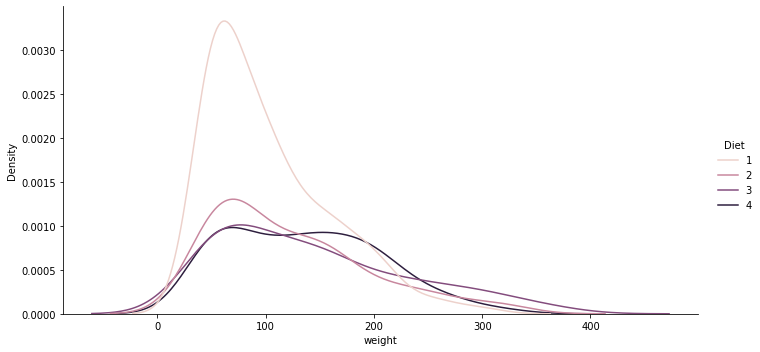

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.displot(  data=df_chick_weights,
              x='weight',
              hue='Diet',
              kind='kde',
              aspect=2
          )
plt.show();

#### Blocking experimental data

You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a productivity_subjects DataFrame. Split the provided dataset into two even groups of 50 entries each.